![Python-MySQL Integration.png](<attachment:Python-MySQL Integration.png>)

## **Restaurant Pizza Sales Analysis**

### 1.1 Introduction

MySQL is one of the popular Relational Database Management Systems (RDMS). RDMS have been in existence since the 1970s. They are highly optimized to handle huge databases. This notebook demonstates the integration of MySQL and Python using Google Colab Notebook environment.

The analysis will be performed using the `pizza_sales` database that consist of four tables:
- order_details,
- orders,
- pizza_type, and
- pizza.

The original dataset can be downloaded from [kaggle](https://www.kaggle.com/datasets/ylenialongo/pizza-sales).
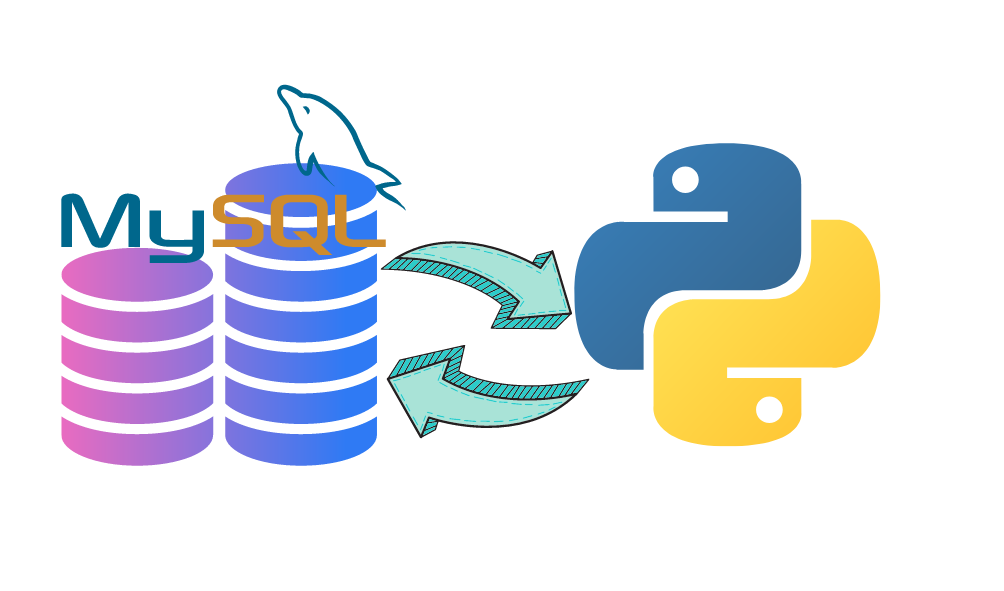

_**Data dictionary**_

| **Table**       | **Field**       | **Description**                                                                 |
|-----------------|-----------------|---------------------------------------------------------------------------------|
| **orders**      | order_id        | Unique identifier for each order                                                |
|                 | customer_id     | Identifier for the customer who placed the order                                |
| **order_details**| order_detail_id | Unique identifier for each order detail                                         |
|                 | order_id        | Identifier for the order                                                        |
|                 | pizza_id        | Identifier for the pizza                                                        |
|                 | quantity        | Number of pizzas ordered                                                        |
| **pizzas**      | pizza_id        | Unique identifier for each pizza                                                |
|                 | pizza_type_id   | Identifier for the type of pizza                                                |
|                 | pizza_size_id   | Identifier for the size of the pizza                                            |
| **pizza_types**  | pizza_type_id   | Unique identifier for each type of pizza                                        |
|                 | name            | Name of the pizza type                                                          |
|                 | category        | Category of the pizza type (e.g., vegetarian, non-vegetarian)                       |


### 1.2 Business Questions

Gathering a set of key business questions guides us in the Exploratory Data Analysis (EDA) process. Below are some questions to help us gain more insights regarding the restaurant business operations:

- What is the total number of orders placed?

- How much is the total revenue generated by the restaurant?

- How is the pricing pattern for items sold by the restaurant?

- What is popular pizza ordered?

- What are the top most ordered pizza types along their quantities?

- What are the quantities of each pizza category ordered?

- How is the distribution of orders by hours of the day?

- What is the category-wise distribution of pizzas?

- What is the average number of pizzas ordered per day?

- What the top most ordered pizza type base by revenue?

- What is the percentage contribution of each pizza type to revenue?

- What is the cumulative revenue generated over time?


### 1.3 Install Required Libraries

The `mysql-connector-python` package is a driver that we use to connect Python with MySQL databases.

In [1]:
!pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 53.7 MB/s eta 0:00:00


We need to setup MySQL Server on our Google Colab environment using the following command:

In [ ]:
!apt-get -y install mysql-server

### 1.4 Start MySQL Server and Connect to MySQL

Note: If you are using a jupyter notebook to access your MySQL with Python, you can skip the two commands for starting MySQL Server and setting root password and go directly to the `connection` command.

Start MySQL Server using the command below;

In [3]:
# start MySQL Server
!service mysql start

 * Starting MySQL database server mysqld
su: warning: cannot change directory to /nonexistent: No such file or directory
   ...done.


Setup the root password as `‘password’`. For real-world scenarios, ensure you use stronger passwords.

In [6]:
# Set root password for MySQL Server
!mysql -e "ALTER USER 'root'@'localhost' IDENTIFIED WITH mysql_native_password BY 'password';FLUSH PRIVILEGES;"


Make a connection to your MySQL server using Python as follows;

In [7]:
# connect to MySQL

import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="password"
)

print(mydb)


### **2. Data Processing**

### 2.1 Create Database Schema

**Note:** The individual data sheets are shown as .csv files in the Dataset folder under the current repository. The four datasets form part of the schema for pizza_sales database. Please note that we can still do the analysis directly using the datasets, but the main purpose of this notebook is to demonstrate knowledge of SQL for data analysis.

### _2.1.1 Create and Use pizza_sales Database_

First, we create the database `pizza_sales`, if it doesn't exit in our MySQL Server.

In [8]:
# prompt: create database pizza_sales if not exist. First, pass the sql statement to a string variable, then call it in the execute statement

mycursor = mydb.cursor()

sql = "CREATE DATABASE IF NOT EXISTS pizza_sales"
mycursor.execute(sql)


In [10]:
# check that the database has been created
sql = "SHOW DATABASES"
mycursor.execute(sql)

for x in mycursor:
  print(x)


('information_schema',)
('mysql',)
('performance_schema',)
('pizza_sales',)
('sys',)


### _2.1.2 Use pizza_sales database_

Select the pizza_sales database for subsequent operations.

In [11]:
# use pizza_sales database
sql = "USE pizza_sales"
mycursor.execute(sql)


### _2.1.3 Create Tables_

We need to create four table schemas for our database. The structure and data to be populated into the pizza_sales database comes from the four datasets provided.
- order_details.csv,
- orders.csv,
- pizza_types.csv, and
- pizzas.csv

In [19]:
# create table schemas, IF NOT EXISTS, for the four datasets in the pizza_sales database.

mycursor = mydb.cursor()

# drop table if exists
mycursor.execute('DROP TABLE IF EXISTS order_details;')

# Create table for order_details
sql = """
CREATE TABLE IF NOT EXISTS order_details (
    order_details_id INT PRIMARY KEY,
    order_id INT,
    pizza_id VARCHAR(50),
    quantity INT
);
"""
mycursor.execute(sql)


####################################################################################


# drop table if exists
mycursor.execute('DROP TABLE IF EXISTS orders;')

# Create table for orders
sql = """
CREATE TABLE IF NOT EXISTS orders (
    order_id INT PRIMARY KEY,
    date DATE,
    time TIME
);
"""
mycursor.execute(sql)



####################################################################################


# drop table if exists
mycursor.execute('DROP TABLE IF EXISTS pizza_types;')

# Create table for pizza_types
sql = """
CREATE TABLE IF NOT EXISTS pizza_types (
    pizza_type_id VARCHAR(50) PRIMARY KEY,
    name VARCHAR(255),
    category VARCHAR(255),
    ingredients TEXT
);
"""
mycursor.execute(sql)



####################################################################################


# drop table if exists
mycursor.execute('DROP TABLE IF EXISTS pizzas;')

# Create table for pizzas
sql = """
CREATE TABLE IF NOT EXISTS pizzas (
    pizza_id VARCHAR(50),
    pizza_type_id VARCHAR(50),
    size VARCHAR(20),
    price DECIMAL(10, 2)
);
"""
mycursor.execute(sql)

Let's show the new pizza_sales schema to make sure that the tables have been created.

In [20]:
# prompt: show tables in pizza_sales

mycursor = mydb.cursor()
sql = "SHOW TABLES"
mycursor.execute(sql)

for x in mycursor:
  print(x)


('order_details',)
('orders',)
('pizza_types',)
('pizzas',)


Let's also check the schema of the created tables.

In [24]:
# prompt: show schema of each table

mycursor = mydb.cursor()

# Show schema for order_details
sql = "DESCRIBE order_details"
mycursor.execute(sql)
print("order_details table schema:")
print("="*80)
for x in mycursor:
  print(x)

# Show schema for orders
sql = "DESCRIBE orders"
mycursor.execute(sql)
print("\norders table schema:")
print("="*80)
for x in mycursor:
  print(x)

# Show schema for pizza_types
sql = "DESCRIBE pizza_types"
mycursor.execute(sql)
print("\npizza_types table schema:")
print("="*80)
for x in mycursor:
  print(x)

# Show schema for pizzas
sql = "DESCRIBE pizzas"
mycursor.execute(sql)
print("\npizzas table schema:")
print("="*80)
for x in mycursor:
  print(x)


order_details table schema:
('order_details_id', 'int', 'NO', 'PRI', None, '')
('order_id', 'int', 'YES', '', None, '')
('pizza_id', 'varchar(50)', 'YES', '', None, '')
('quantity', 'int', 'YES', '', None, '')

orders table schema:
('order_id', 'int', 'NO', 'PRI', None, '')
('date', 'date', 'YES', '', None, '')
('time', 'time', 'YES', '', None, '')

pizza_types table schema:
('pizza_type_id', 'varchar(50)', 'NO', 'PRI', None, '')
('name', 'varchar(255)', 'YES', '', None, '')
('category', 'varchar(255)', 'YES', '', None, '')
('ingredients', 'text', 'YES', '', None, '')

pizzas table schema:
('pizza_id', 'varchar(50)', 'YES', '', None, '')
('pizza_type_id', 'varchar(50)', 'YES', '', None, '')
('size', 'varchar(20)', 'YES', '', None, '')
('price', 'decimal(10,2)', 'YES', '', None, '')


### _2.1.4 Import the CSV data into the MySQL tables_

We now need to  insert the records in MySQL tables with below python code:

In [25]:
# import data from the four datasets into the created tables for pizza_sales

import pandas as pd

# Replace with the actual paths to your CSV files if needed

# Load data from order_details.csv
order_details_df = pd.read_csv('order_details.csv')

# Insert data into the order_details table
for i, row in order_details_df.iterrows():
  sql = "INSERT INTO order_details (order_details_id, order_id, pizza_id, quantity) VALUES (%s, %s, %s, %s)" # %S means string values
  val = (row['order_details_id'], row['order_id'], row['pizza_id'], row['quantity'])
  mycursor.execute(sql, val)
mydb.commit()


# Load data from orders.csv
orders_df = pd.read_csv('orders.csv')

# Insert data into the orders table
for i, row in orders_df.iterrows():
  sql = "INSERT INTO orders (order_id, date, time) VALUES (%s, %s, %s)" # %S means string values
  val = (row['order_id'], row['date'], row['time'])
  mycursor.execute(sql, val)
mydb.commit()


# Load data from pizza_types.csv
pizza_types_df = pd.read_csv('pizza_types.csv')

# Insert data into the pizza_types table
for i, row in pizza_types_df.iterrows():
  sql = "INSERT INTO pizza_types (pizza_type_id, name, category, ingredients) VALUES (%s, %s, %s, %s)" # %S means string values
  val = (row['pizza_type_id'], row['name'], row['category'], row['ingredients'])
  mycursor.execute(sql, val)
mydb.commit()


# Load data from pizzas.csv
pizzas_df = pd.read_csv('pizzas.csv')

# Insert data into the pizzas table
for i, row in pizzas_df.iterrows():
  sql = "INSERT INTO pizzas (pizza_id, pizza_type_id, size, price) VALUES (%s, %s, %s, %s)" # %S means string values
  val = (row['pizza_id'], row['pizza_type_id'], row['size'], row['price'])
  mycursor.execute(sql, val)
mydb.commit()

print('Data imported successfully.')


Data imported successfully.


### _2.1.5 Check Table SIze and Print Sample Data_

Let's check the row counts in each table.

In [26]:
# check the size of each table

mycursor = mydb.cursor()

# Check the size of the order_details table
sql = "SELECT COUNT(*) FROM order_details"
mycursor.execute(sql)
result = mycursor.fetchone()
print("order_details table size:", result[0])
print("="*80)

# Check the size of the orders table
sql = "SELECT COUNT(*) FROM orders"
mycursor.execute(sql)
result = mycursor.fetchone()
print("orders table size:", result[0])
print("="*80)

# Check the size of the pizza_types table
sql = "SELECT COUNT(*) FROM pizza_types"
mycursor.execute(sql)
result = mycursor.fetchone()
print("pizza_types table size:", result[0])
print("="*80)

# Check the size of the pizzas table
sql = "SELECT COUNT(*) FROM pizzas"
mycursor.execute(sql)
result = mycursor.fetchone()
print("pizzas table size:", result[0])


order_details table size: 48620
orders table size: 21350
pizza_types table size: 32
pizzas table size: 96


Let's print the head [first 5 rows] from each table.

In [30]:
# print first 5 rows from each table

mycursor = mydb.cursor()

# Print first 5 rows from order_details table
sql = "SELECT * FROM order_details LIMIT 5"
mycursor.execute(sql)
print("order_details table:")
print("="*80)

for row in mycursor:
    print(row)

print("\n\n")  # Add space between tables


# Print first 5 rows from orders table
sql = "SELECT * FROM orders LIMIT 5"
mycursor.execute(sql)
print("orders table:")
print("="*80)

for row in mycursor:
    print(row)

print("\n\n")  # Add space between tables


# Print first 5 rows from pizza_types table
sql = "SELECT * FROM pizza_types LIMIT 5"
mycursor.execute(sql)
print("pizza_types table:")
print("="*80)

for row in mycursor:
    print(row)

print("\n\n")  # Add space between tables


# Print first 5 rows from pizzas table
sql = "SELECT * FROM pizzas LIMIT 5"
mycursor.execute(sql)
print("pizzas table:")
print("="*80)

for row in mycursor:
    print(row)


order_details table:
(1, 1, 'hawaiian_m', 1)
(2, 2, 'classic_dlx_m', 1)
(3, 2, 'five_cheese_l', 1)
(4, 2, 'ital_supr_l', 1)
(5, 2, 'mexicana_m', 1)



orders table:
(1, datetime.date(2015, 1, 1), datetime.timedelta(seconds=41916))
(2, datetime.date(2015, 1, 1), datetime.timedelta(seconds=43060))
(3, datetime.date(2015, 1, 1), datetime.timedelta(seconds=43948))
(4, datetime.date(2015, 1, 1), datetime.timedelta(seconds=44191))
(5, datetime.date(2015, 1, 1), datetime.timedelta(seconds=44490))



pizza_types table:
('bbq_ckn', 'The Barbecue Chicken Pizza', 'Chicken', 'Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce')
('big_meat', 'The Big Meat Pizza', 'Classic', 'Bacon, Pepperoni, Italian Sausage, Chorizo Sausage')
('brie_carre', 'The Brie Carre Pizza', 'Supreme', 'Brie Carre Cheese, Prosciutto, Caramelized Onions, Pears, Thyme, Garlic')
('calabrese', 'The Calabrese Pizza', 'Supreme', '�Nduja Salami, Pancetta, Tomatoes, Red Onions, Friggitello Peppers, G

Let's print the tail [last 5 rows] from each table.

In [29]:
# prompt: print last five rows from each  table. Leave space between each table's output

mycursor = mydb.cursor()

# Print last 5 rows from order_details table
sql = "SELECT * FROM order_details ORDER BY order_details_id DESC LIMIT 5"
mycursor.execute(sql)
print("order_details table:")
print("="*80)

for row in mycursor:
    print(row)

print("\n\n")  # Add space between tables


# Print last 5 rows from orders table
sql = "SELECT * FROM orders ORDER BY order_id DESC LIMIT 5"
mycursor.execute(sql)
print("orders table:")
print("="*80)

for row in mycursor:
    print(row)

print("\n\n")  # Add space between tables


# Print last 5 rows from pizza_types table
sql = "SELECT * FROM pizza_types ORDER BY pizza_type_id DESC LIMIT 5"
mycursor.execute(sql)
print("pizza_types table:")
print("="*80)

for row in mycursor:
    print(row)

print("\n\n")  # Add space between tables


# Print last 5 rows from pizzas table
sql = "SELECT * FROM pizzas ORDER BY pizza_id DESC LIMIT 5"
mycursor.execute(sql)
print("pizzas table:")
print("="*80)

for row in mycursor:
    print(row)


order_details table:
(48620, 21350, 'bbq_ckn_s', 1)
(48619, 21349, 'mexicana_l', 1)
(48618, 21348, 'napolitana_s', 1)
(48617, 21348, 'four_cheese_l', 1)
(48616, 21348, 'ckn_alfredo_m', 1)



orders table:
(21350, datetime.date(2015, 12, 31), datetime.timedelta(seconds=82925))
(21349, datetime.date(2015, 12, 31), datetime.timedelta(seconds=79794))
(21348, datetime.date(2015, 12, 31), datetime.timedelta(seconds=76990))
(21347, datetime.date(2015, 12, 31), datetime.timedelta(seconds=76477))
(21346, datetime.date(2015, 12, 31), datetime.timedelta(seconds=75067))



pizza_types table:
('veggie_veg', 'The Vegetables + Vegetables Pizza', 'Veggie', 'Mushrooms, Tomatoes, Red Peppers, Green Peppers, Red Onions, Zucchini, Spinach, Garlic')
('the_greek', 'The Greek Pizza', 'Classic', 'Kalamata Olives, Feta Cheese, Tomatoes, Garlic, Beef Chuck Roast, Red Onions')
('thai_ckn', 'The Thai Chicken Pizza', 'Chicken', 'Chicken, Pineapple, Tomatoes, Red Peppers, Thai Sweet Chilli Sauce')
('spinach_supr', 

### **3. Exploratory Data Analysis**

We've successfully loaded our data into the database and performed some basic checks. We can now focus on analyzing the characteristics, behaviors, pattern and trends in order to gain business insights. Key business questions presented earlier guides our EDA process.

### 3.1 Total Orders Placed

In [31]:
# total orders placed from orders total_orders

mycursor = mydb.cursor()

sql = """
SELECT
    COUNT(*) AS total_orders
FROM
    orders;
"""
mycursor.execute(sql)
result = mycursor.fetchone()
print("Total Orders Placed:", result[0])


Total Orders Placed: 21350


### 3.2 Total Revenue Generated

In [35]:
# total revenue generated as total_revenue

mycursor = mydb.cursor()

sql = """
SELECT
    FORMAT(SUM(od.quantity * p.price), 2) AS total_revenue # format the result to two decimal places
FROM
    order_details od
JOIN
    pizzas p ON od.pizza_id = p.pizza_id;
"""

mycursor.execute(sql)
result = mycursor.fetchone()

print("Total Revenue Generated:", result[0])


Total Revenue Generated: 817,860.05


### 3.3 Highest priced pizza

In [38]:
# highest priced pizza

mycursor = mydb.cursor()

sql = """
    SELECT *
    FROM
        pizzas
    ORDER BY
        price DESC
    LIMIT 1;
"""
mycursor.execute(sql)
result = mycursor.fetchall()
for row in result:
    print(row)


('the_greek_xxl', 'the_greek', 'XXL', Decimal('35.95'))


### 3.4 Popular size ordered

In [42]:
#most ordered pizza from order_details
mycursor = mydb.cursor()

sql = """
    SELECT
      pizza_id,
      COUNT(*) AS order_count
    FROM
      order_details
    GROUP BY
      pizza_id
    ORDER BY
      order_count DESC
    LIMIT 1;
"""
mycursor.execute(sql)
result = mycursor.fetchall()
for row in result:
    print(row)

('big_meat_s', 1811)


### 3.5 Top five ordered pizzas

In [43]:
# Top five ordered pizzas

mycursor = mydb.cursor()

sql = """
SELECT
    p.name AS pizza_name,
    SUM(od.quantity) AS total_quantity
FROM
    order_details od
JOIN
    pizzas pz ON od.pizza_id = pz.pizza_id
JOIN
    pizza_types p ON pz.pizza_type_id = p.pizza_type_id
GROUP BY
    p.name
ORDER BY
    total_quantity DESC
LIMIT 5;
"""
mycursor.execute(sql)
result = mycursor.fetchall()
for row in result:
    print(row)


('The Classic Deluxe Pizza', Decimal('2453'))
('The Barbecue Chicken Pizza', Decimal('2432'))
('The Hawaiian Pizza', Decimal('2422'))
('The Pepperoni Pizza', Decimal('2418'))
('The Thai Chicken Pizza', Decimal('2371'))


### 3.6 Quantity of each pizza category ordered

In [46]:
# unique pizza categories from pizza_types

mycursor = mydb.cursor()

sql = """
SELECT DISTINCT category
FROM pizza_types;
"""
mycursor.execute(sql)
result = mycursor.fetchall()
for row in result:
    print(row[0])


Chicken
Classic
Supreme
Veggie


In [45]:
# Quantity of each category ordered

mycursor = mydb.cursor()

sql = """
SELECT
    pt.category,
    SUM(od.quantity) AS total_quantity
FROM
    order_details od
JOIN
    pizzas p ON od.pizza_id = p.pizza_id
JOIN
    pizza_types pt ON p.pizza_type_id = pt.pizza_type_id
GROUP BY
    pt.category
ORDER BY
    total_quantity DESC;
"""
mycursor.execute(sql)
result = mycursor.fetchall()
for row in result:
    print(row)


('Classic', Decimal('14888'))
('Supreme', Decimal('11987'))
('Veggie', Decimal('11649'))
('Chicken', Decimal('11050'))


### 3.7 Distribution of Orders by Day Hours

In [47]:
# Orders by day hours

mycursor = mydb.cursor()

sql = """
    SELECT
        EXTRACT(HOUR FROM time) AS order_hour,
        COUNT(*) AS order_count
    FROM
        orders
    GROUP BY
        order_hour
    ORDER BY
        order_hour;
"""
mycursor.execute(sql)
result = mycursor.fetchall()
for row in result:
    print(row)


(9, 1)
(10, 8)
(11, 1231)
(12, 2520)
(13, 2455)
(14, 1472)
(15, 1468)
(16, 1920)
(17, 2336)
(18, 2399)
(19, 2009)
(20, 1642)
(21, 1198)
(22, 663)
(23, 28)


### 3.8 Distribution by Category

In [48]:
# distribution by category

mycursor = mydb.cursor()

sql = """
SELECT
    pt.category,
    COUNT(*) AS pizza_count
FROM
    pizzas p
JOIN
    pizza_types pt ON p.pizza_type_id = pt.pizza_type_id
GROUP BY
    pt.category
ORDER BY
    pizza_count DESC;
"""
mycursor.execute(sql)
result = mycursor.fetchall()
for row in result:
    print(row)


('Veggie', 27)
('Classic', 26)
('Supreme', 25)
('Chicken', 18)


### 3.9 Average orders per day

In [50]:
# orders per day

mycursor = mydb.cursor()

sql = """
SELECT
    ROUND(AVG(daily_pizzas)) AS average_pizzas_per_day
FROM (
    SELECT
        date,
        SUM(od.quantity) AS daily_pizzas
    FROM
        orders o
    JOIN
        order_details od ON o.order_id = od.order_id
    GROUP BY
        date
) daily_totals;
"""
mycursor.execute(sql)
result = mycursor.fetchone()
print("Average Pizzas Per Day:", result[0])


Average Pizzas Per Day: 138


### 3.10 Top revenue earners

In [64]:
# top revenue earners

mycursor = mydb.cursor()

sql = """
    SELECT
        p.pizza_type_id AS pizza_name,
        SUM(od.quantity * p.price) AS total_revenue
    FROM
        order_details od
    JOIN
        pizzas p ON od.pizza_id = p.pizza_id
    GROUP BY
        p.pizza_type_id
    ORDER BY
        total_revenue DESC
    LIMIT 3;
"""
mycursor.execute(sql)
result = mycursor.fetchall()
for row in result:
    print(row)

('thai_ckn', Decimal('43434.25'))
('bbq_ckn', Decimal('42768.00'))
('cali_ckn', Decimal('41409.50'))


### 3.11 % contribution of each pizza type to revenue

In [53]:
# percentage contribution of each pizza type to revenue to 2 dps

mycursor = mydb.cursor()

sql = """
WITH pizza_revenue AS (
    SELECT p.pizza_type_id AS pizza_name, SUM(od.quantity * p.price) AS total_revenue
    FROM order_details od
    JOIN pizzas p ON od.pizza_id = p.pizza_id
    GROUP BY p.pizza_type_id
),
total_revenue AS (
    SELECT SUM(total_revenue) AS overall_total_revenue
    FROM pizza_revenue
)
SELECT
    pr.pizza_name,
    ROUND((pr.total_revenue / tr.overall_total_revenue) * 100, 2) AS percentage_contribution
FROM
    pizza_revenue pr
JOIN
    total_revenue tr ON 1=1
ORDER BY
    percentage_contribution DESC;
"""
mycursor.execute(sql)
result = mycursor.fetchall()
for row in result:
    print(row)


('thai_ckn', Decimal('5.31'))
('bbq_ckn', Decimal('5.23'))
('cali_ckn', Decimal('5.06'))
('classic_dlx', Decimal('4.67'))
('spicy_ital', Decimal('4.26'))
('southw_ckn', Decimal('4.24'))
('ital_supr', Decimal('4.09'))
('four_cheese', Decimal('3.95'))
('hawaiian', Decimal('3.95'))
('sicilian', Decimal('3.78'))
('pepperoni', Decimal('3.69'))
('the_greek', Decimal('3.48'))
('mexicana', Decimal('3.27'))
('five_cheese', Decimal('3.19'))
('peppr_salami', Decimal('3.12'))
('ital_cpcllo', Decimal('3.07'))
('veggie_veg', Decimal('2.98'))
('prsc_argla', Decimal('2.96'))
('napolitana', Decimal('2.95'))
('spinach_fet', Decimal('2.85'))
('big_meat', Decimal('2.81'))
('pep_msh_pep', Decimal('2.30'))
('ckn_alfredo', Decimal('2.07'))
('ckn_pesto', Decimal('2.04'))
('soppressata', Decimal('2.01'))
('ital_veggie', Decimal('1.96'))
('calabrese', Decimal('1.95'))
('spin_pesto', Decimal('1.91'))
('mediterraneo', Decimal('1.88'))
('spinach_supr', Decimal('1.87'))
('green_garden', Decimal('1.71'))
('brie_carr

### 3.12 Cummulative revenue generated

In [58]:
# cumulative revenue overtime to 2 dp with digit separator.

mycursor = mydb.cursor()

sql = """
    SELECT
        o.date,
        FORMAT(SUM(od.quantity * p.price), 2) AS daily_revenue,
        FORMAT(SUM(SUM(od.quantity * p.price)) OVER (ORDER BY o.date), 2) AS cumulative_revenue
    FROM
        orders o
    JOIN
        order_details od   ON o.order_id =  od.order_id
    JOIN
        pizzas p ON od.pizza_id = p.pizza_id
    GROUP BY
        o.date
    ORDER BY
        o.date;
"""
mycursor.execute(sql)
result = mycursor.fetchall()
for row in result:
    print(row)


(datetime.date(2015, 1, 1), '2,713.85', '2,713.85')
(datetime.date(2015, 1, 2), '2,731.90', '5,445.75')
(datetime.date(2015, 1, 3), '2,662.40', '8,108.15')
(datetime.date(2015, 1, 4), '1,755.45', '9,863.60')
(datetime.date(2015, 1, 5), '2,065.95', '11,929.55')
(datetime.date(2015, 1, 6), '2,428.95', '14,358.50')
(datetime.date(2015, 1, 7), '2,202.20', '16,560.70')
(datetime.date(2015, 1, 8), '2,838.35', '19,399.05')
(datetime.date(2015, 1, 9), '2,127.35', '21,526.40')
(datetime.date(2015, 1, 10), '2,463.95', '23,990.35')
(datetime.date(2015, 1, 11), '1,872.30', '25,862.65')
(datetime.date(2015, 1, 12), '1,919.05', '27,781.70')
(datetime.date(2015, 1, 13), '2,049.60', '29,831.30')
(datetime.date(2015, 1, 14), '2,527.40', '32,358.70')
(datetime.date(2015, 1, 15), '1,984.80', '34,343.50')
(datetime.date(2015, 1, 16), '2,594.15', '36,937.65')
(datetime.date(2015, 1, 17), '2,064.10', '39,001.75')
(datetime.date(2015, 1, 18), '1,976.85', '40,978.60')
(datetime.date(2015, 1, 19), '2,387.15', 

## 3.13 Top ordered pizzas by category and revenue

In [62]:
# top 3 ordered pizza based on revenue for each category

mycursor = mydb.cursor()

sql = """
WITH pizza_revenue AS (
    SELECT
        pt.category,
        p.pizza_id,
        pt.name AS pizza_name,
        SUM(od.quantity * p.price) AS total_revenue,
        ROW_NUMBER() OVER (PARTITION BY pt.category ORDER BY SUM(od.quantity * p.price) DESC) As top_3_rank
    FROM
        order_details od
    JOIN
        pizzas p ON od.pizza_id = p.pizza_id
    JOIN
        pizza_types pt ON p.pizza_type_id = pt.pizza_type_id
    GROUP BY
        pt.category, p.pizza_id, pt.name
)
SELECT
    category,
    pizza_id,
    pizza_name,
    FORMAT(total_revenue, 2) AS total_revenue
FROM
    pizza_revenue
WHERE
    top_3_rank <= 3
ORDER BY
    category, total_revenue DESC;
"""
mycursor.execute(sql)
result = mycursor.fetchall()
for row in result:
    print(row)

('Chicken', 'thai_ckn_l', 'The Thai Chicken Pizza', '29,257.50')
('Chicken', 'southw_ckn_l', 'The Southwest Chicken Pizza', '21,082.00')
('Chicken', 'bbq_ckn_l', 'The Barbecue Chicken Pizza', '20,584.00')
('Classic', 'big_meat_s', 'The Big Meat Pizza', '22,968.00')
('Classic', 'classic_dlx_m', 'The Classic Deluxe Pizza', '18,896.00')
('Classic', 'hawaiian_l', 'The Hawaiian Pizza', '15,163.50')
('Supreme', 'spicy_ital_l', 'The Spicy Italian Pizza', '23,011.75')
('Supreme', 'ital_supr_m', 'The Italian Supreme Pizza', '15,526.50')
('Supreme', 'ital_supr_l', 'The Italian Supreme Pizza', '15,500.25')
('Veggie', 'five_cheese_l', 'The Five Cheese Pizza', '26,066.50')
('Veggie', 'four_cheese_l', 'The Four Cheese Pizza', '23,622.20')
('Veggie', 'mexicana_l', 'The Mexicana Pizza', '17,556.75')


### **4. Bridging MySQL and Pandas**

**Just one more tip 💁**

You can directly fetch data from MySQL and load it into a pandas DataFrame. The rest of the analysis process will be magical.

In [67]:
# Load orders table to pandas pandas dataframe

import pandas as pd

# Connect to MySQL
conn = mysql.connector.connect(user='root', password='password', host='localhost', database='pizza_sales')

# Fetch data into a pandas DataFrame
sql = "SELECT * FROM orders"
df = pd.read_sql(sql, conn)
df.head()


<ipython-input-67-20cd34c40f5c>:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn)


,order_id,date,time
0,1,2015-01-01,0 days 11:38:36
1,2,2015-01-01,0 days 11:57:40
2,3,2015-01-01,0 days 12:12:28
3,4,2015-01-01,0 days 12:16:31
4,5,2015-01-01,0 days 12:21:30


### **5. Conclusion**

MySQL is one of the most utilized RDMS in Data Analysis and Data Science. It is proven application powering multitudes of business systems. You can use it to handle large amounts of relational data. An integration with Python signifies the comming together of legends.